## Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
rcParams_ticks = {'figure.dpi': 200.0, 'xtick.bottom': True, 'ytick.left': False, 'legend.loc': 'lower right', 'legend.fancybox': True,
                  'axes.edgecolor': 'grey', 'axes.xmargin': 0.05, 'text.usetex': False}
sns.set_theme(style='ticks', rc=rcParams_ticks)

In [11]:
trained_epochs = 100

alpha = np.load(f"{BASE_DIR}/{DATASET}_alpha_{trained_epochs}e.npy", allow_pickle=True)
alpha_js = np.load(f"{BASE_DIR}/{DATASET}_alpha_j_{trained_epochs}e.npy", allow_pickle=True)
representer_vals = np.load(f"{BASE_DIR}/{DATASET}_representer_val_{trained_epochs}e.npy", allow_pickle=True)
sim_vals = np.load(f"{BASE_DIR}/{DATASET}_similarity_{trained_epochs}e.npy", allow_pickle=True)
sim_norm_vals = np.load(f"{BASE_DIR}/{DATASET}_similarity_normalized_{trained_epochs}e.npy", allow_pickle=True)

In [12]:
alpha_js.shape  # num_test x num_train
sparsity_thresh = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.9]
num_total = np.prod(alpha_js.shape)
for t in sparsity_thresh:
    num_gt_t = (np.abs(alpha_js) > t).sum()
    pct_gt_t = (num_gt_t / num_total) * 100
    pct_lt_t = 100 - pct_gt_t
    print(f"{pct_lt_t} percent of is almost 0 (<={t})")
    
# A CDF plot can be helpful visualization then!
# Different CDF for model trained for different epochs
# but threshold values very low

89.141342 percent of is almost 0 (<=1e-05)
94.35128716666667 percent of is almost 0 (<=0.0001)
97.4130905 percent of is almost 0 (<=0.001)
99.39201333333334 percent of is almost 0 (<=0.01)
99.99173733333333 percent of is almost 0 (<=0.1)
100.0 percent of is almost 0 (<=0.5)
100.0 percent of is almost 0 (<=0.9)


In [13]:
for t in sparsity_thresh:
    num_gt_t = (np.abs(alpha_js) > t).sum()
    pct_gt_t = (num_gt_t / num_total) * 100
    print(f"{pct_gt_t} percent of training instances are influential (Grad>{t})")

10.858658 percent of training instances are influential (Grad>1e-05)
5.648712833333333 percent of training instances are influential (Grad>0.0001)
2.5869095 percent of training instances are influential (Grad>0.001)
0.6079866666666667 percent of training instances are influential (Grad>0.01)
0.008262666666666668 percent of training instances are influential (Grad>0.1)
0.0 percent of training instances are influential (Grad>0.5)
0.0 percent of training instances are influential (Grad>0.9)


90
15
69
3
14


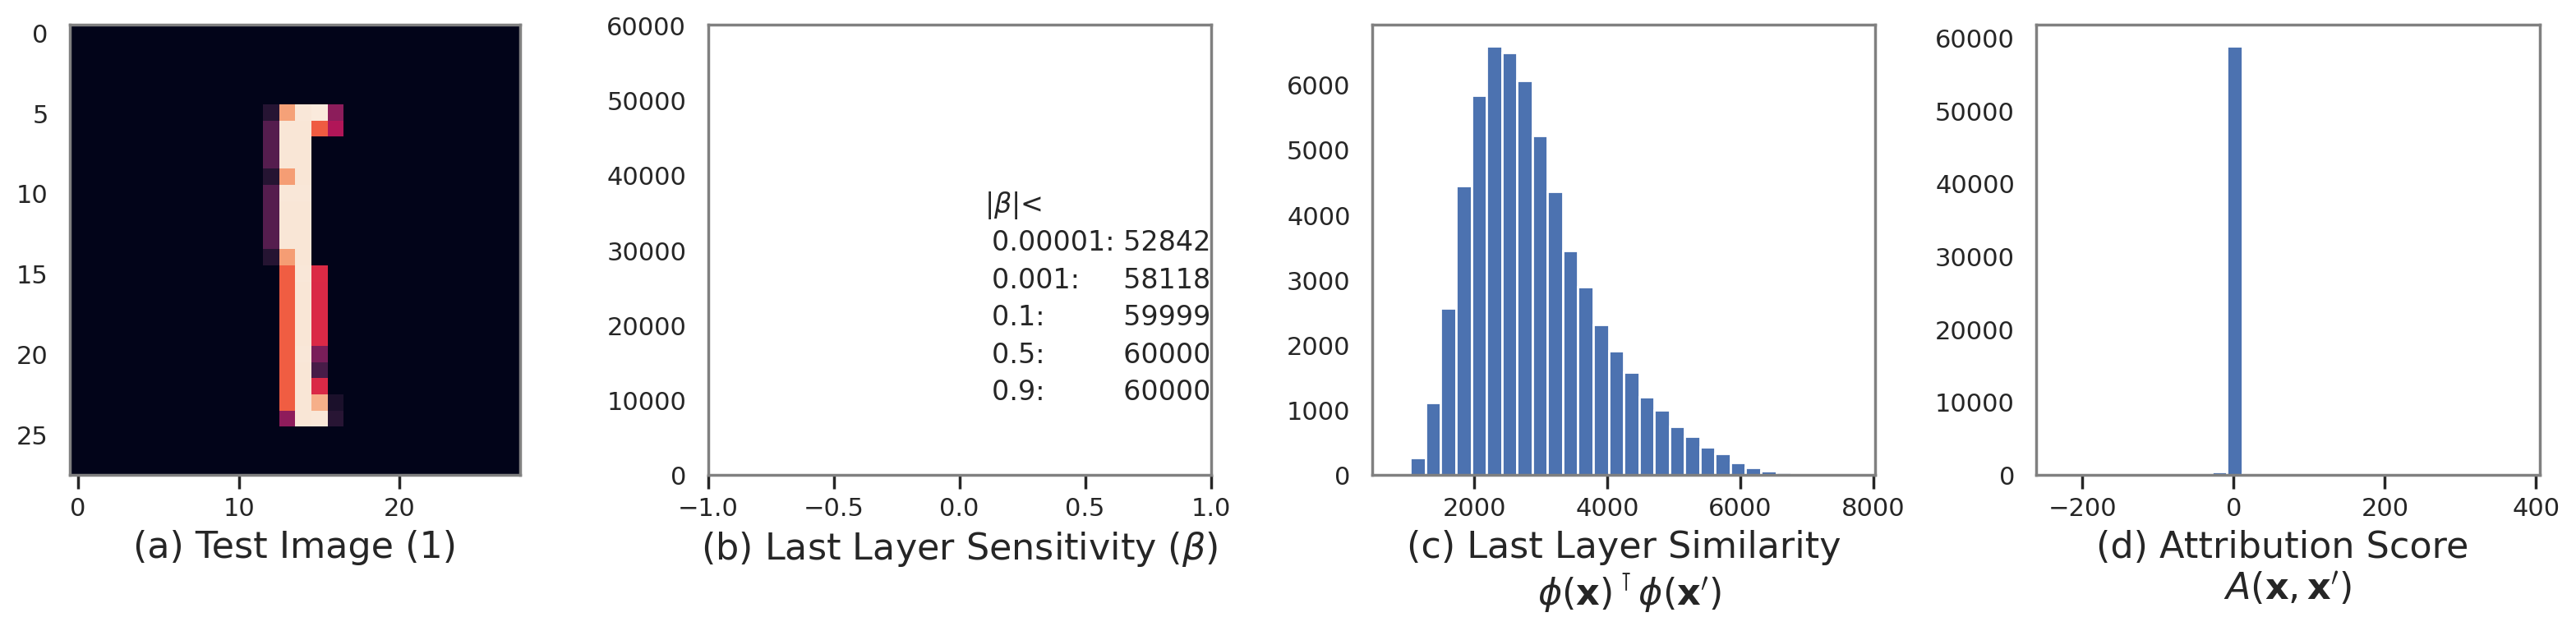

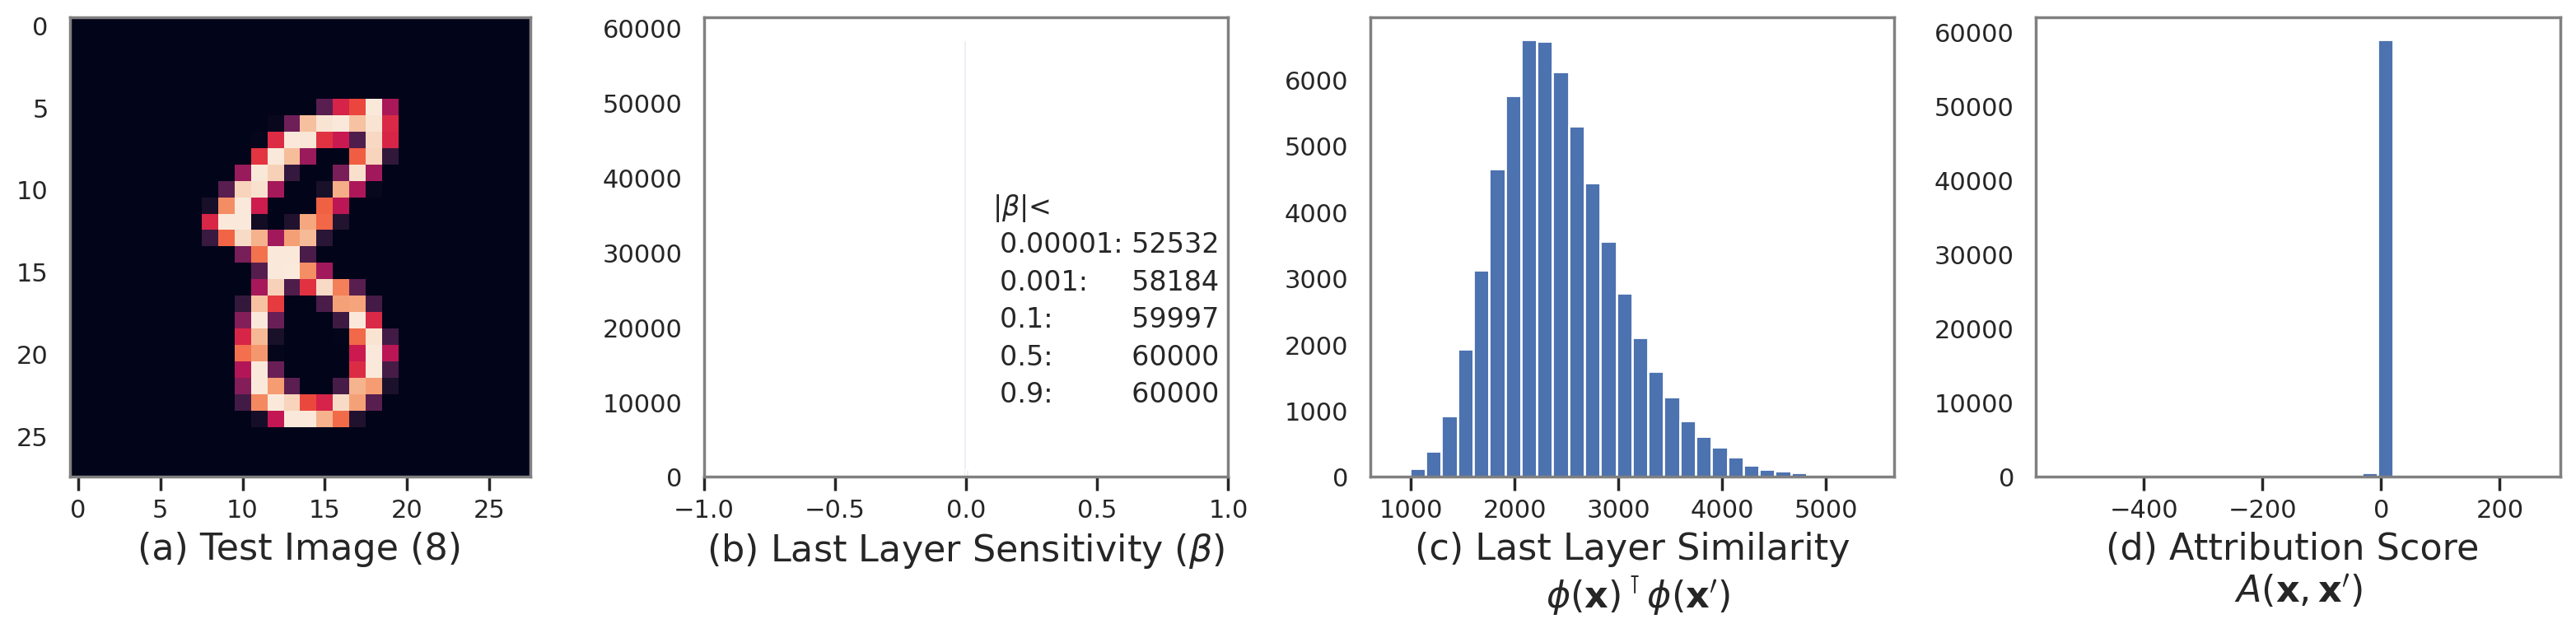

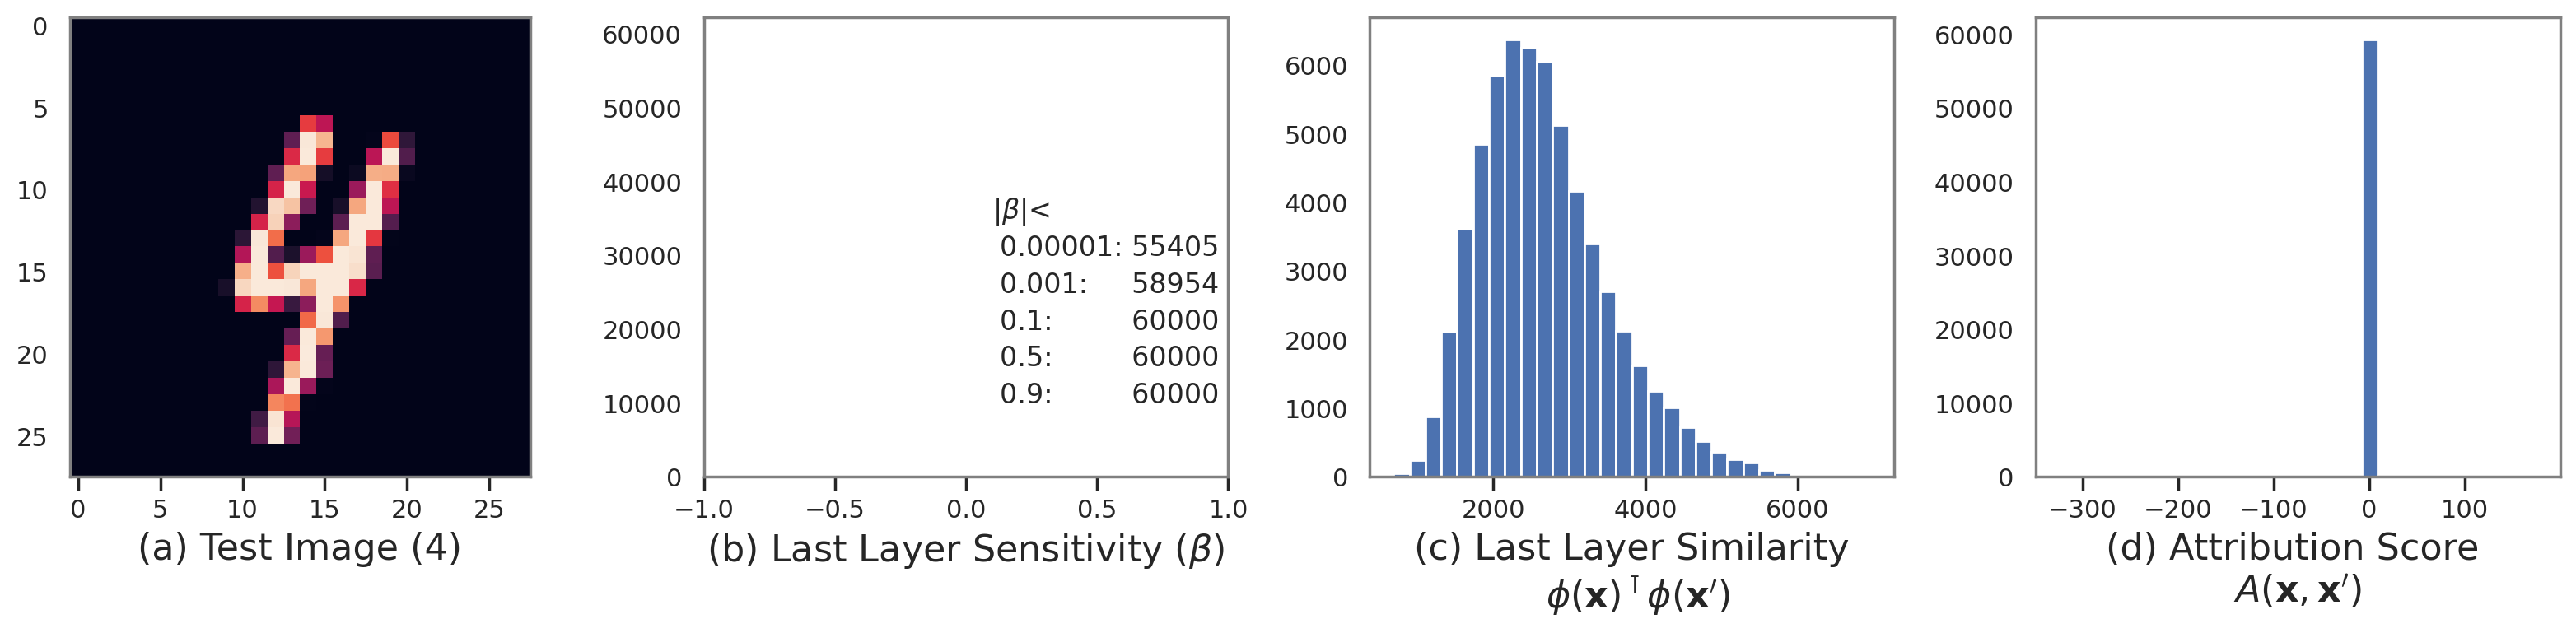

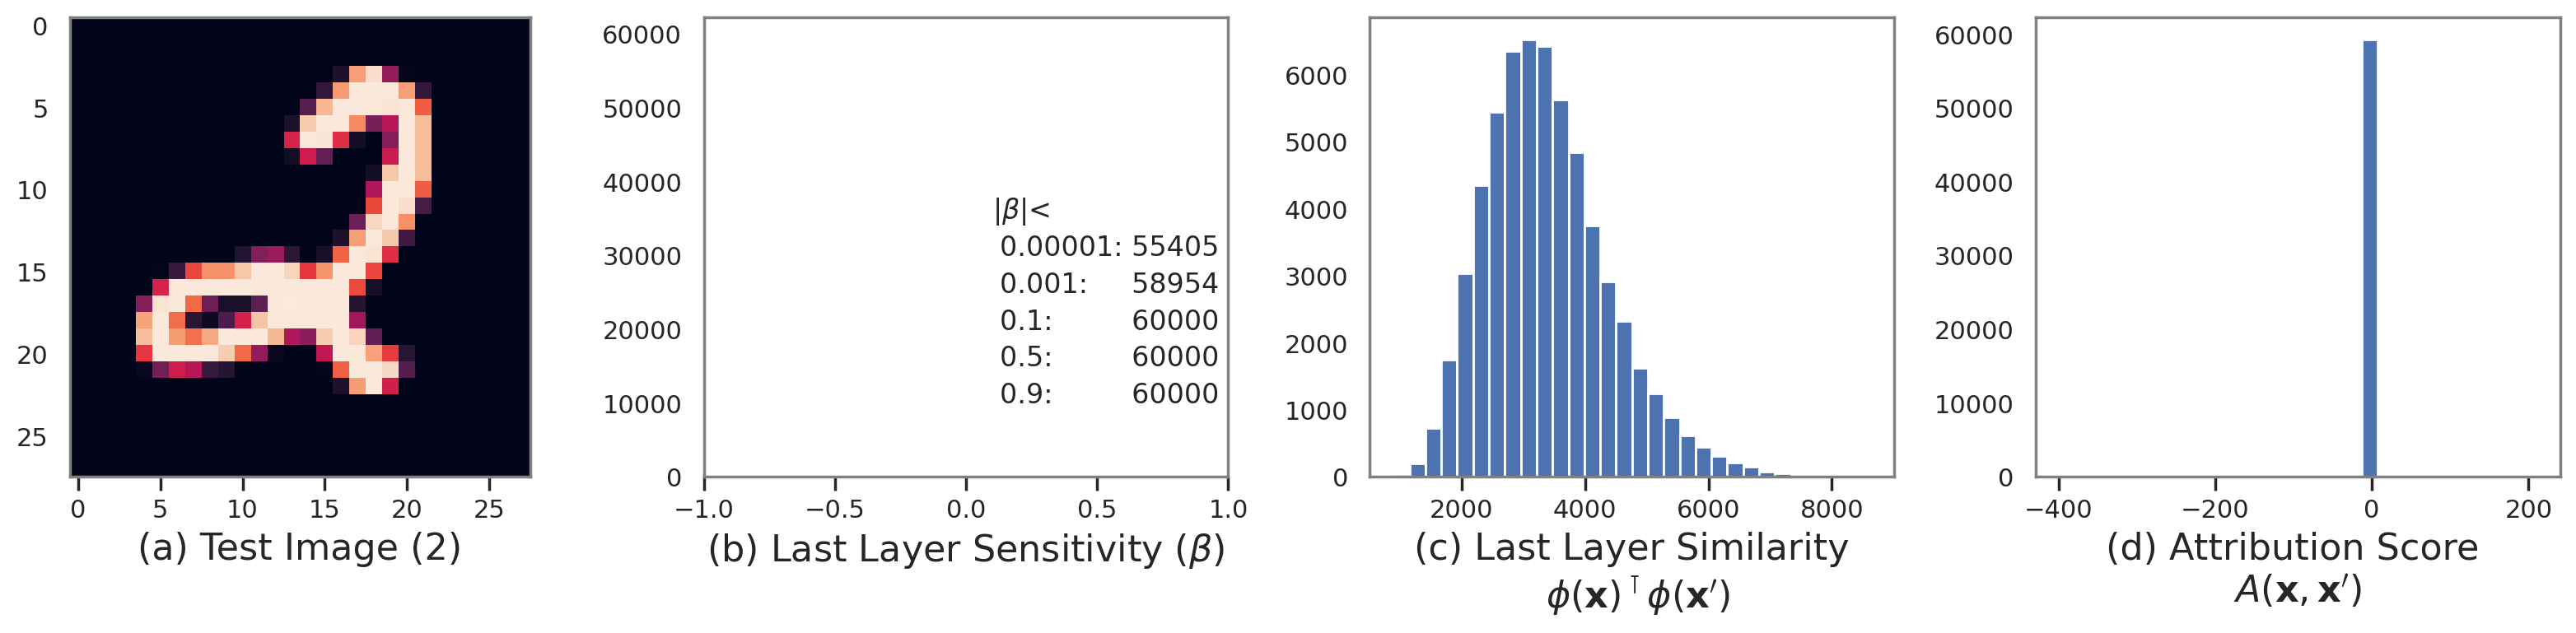

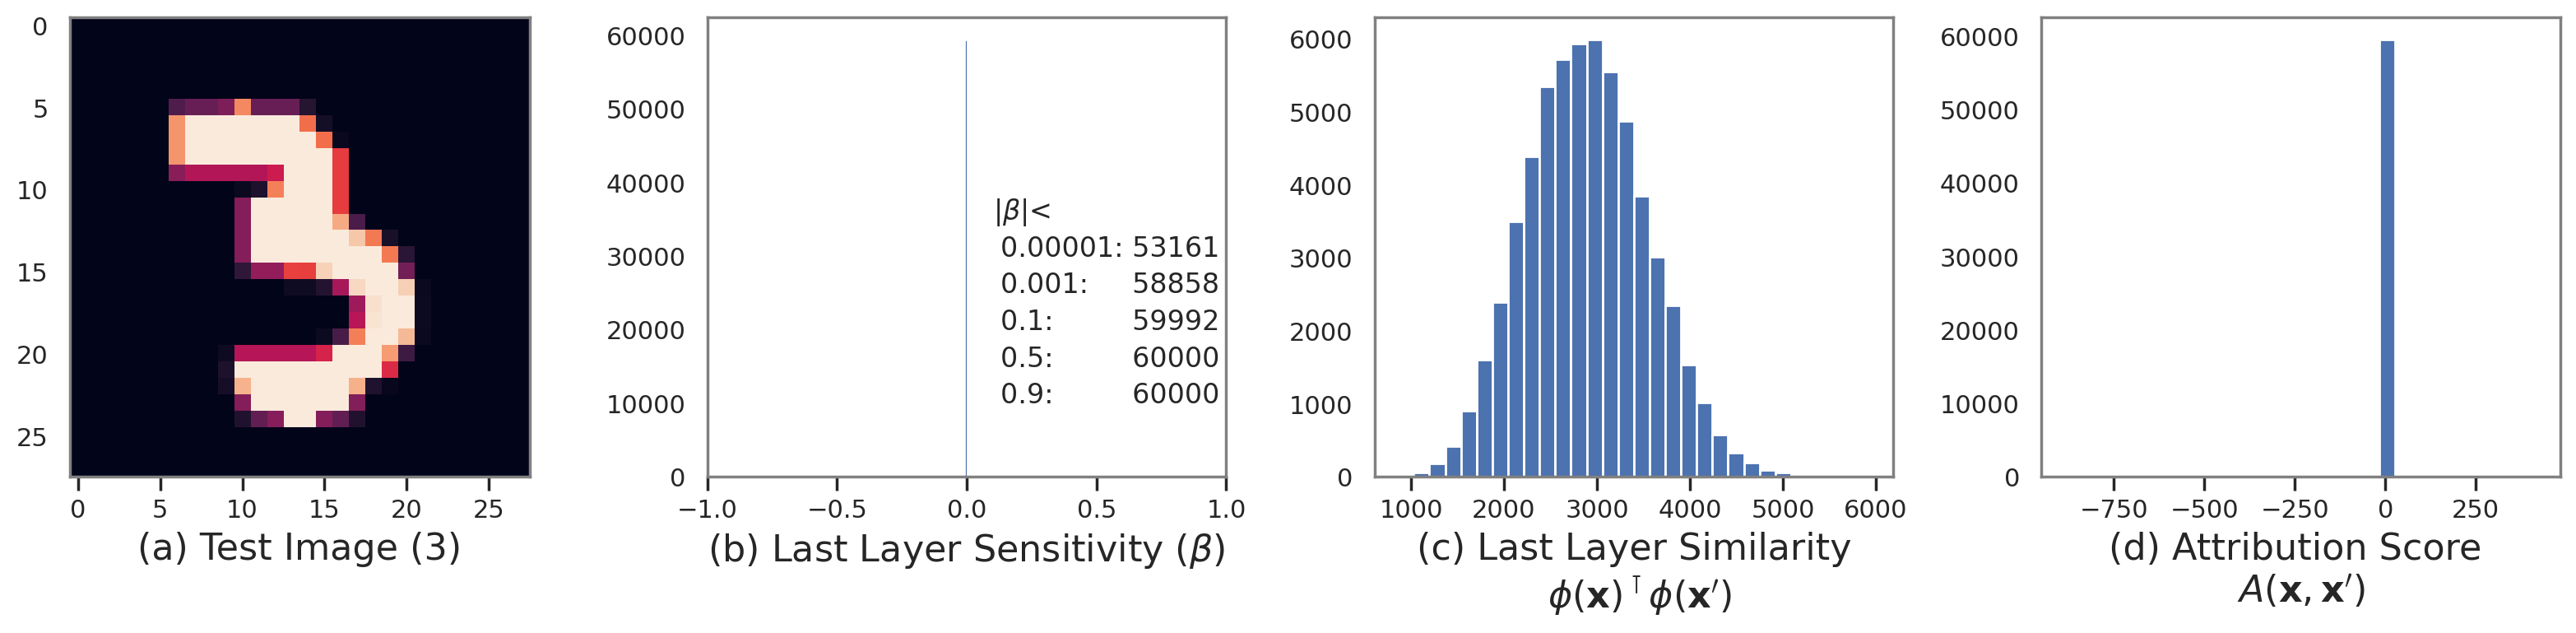

In [25]:
PLOT_HIGH_VAL = False
n_bins = 30
ix_rand = np.random.choice(100, 5, replace=False)
for i in ix_rand:
  print(i)
  x = X_dev[i].copy()
  alpha = alpha_js[i].copy()
  rep_val = representer_vals[i].copy()
  sim_val = sim_vals[i].copy()
  # sim_val = sim_norm_vals[i].copy()

  if PLOT_HIGH_VAL:
    ix_high = np.where(np.abs(alpha) > 0.1)
    alpha = alpha[ix_high]
    rep_val = rep_val[ix_high]
    sim_val = sim_val[ix_high]

  plt.figure(figsize=(16,4))

  plt.subplot(1, 4, 1)
  plt.imshow(x)
  plt.xlabel(f"(a) Test Image ({np.squeeze(Y_dev)[i]})", fontsize=16)

  plt.subplot(1, 4, 2)
  plt.hist(alpha, bins=n_bins)
  # plt.hist(alpha, bins=3)
  abs_alpha = np.abs(alpha)
  plt.xlim((-1,1))
  if not PLOT_HIGH_VAL:
    plt.text(0.1, 35000, r"|$\beta$|<")
    plt.text(0.13, 30000, r"0.00001" + f": {(abs_alpha<0.00001).sum()}")
    plt.text(0.13, 25000, r"0.001" +  f":     {(abs_alpha<0.001).sum()}")
    plt.text(0.13, 20000, r"0.1" + f":         {(abs_alpha<0.1).sum()}")
    plt.text(0.13, 15000, r"0.5" + f":         {(abs_alpha<0.5).sum()}")
    plt.text(0.13, 10000, r"0.9" + f":         {(abs_alpha<0.9).sum()}")
  plt.xlabel(r"(b) Last Layer Sensitivity ($\beta$)", fontsize=16)

  plt.subplot(1, 4, 3)
  plt.hist(sim_val, bins=n_bins)
  plt.xlabel("(c) Last Layer Similarity\n $\phi(\mathbf{x})^\intercal \phi(\mathbf{x'})$", fontsize=16)

  plt.subplot(1, 4, 4)
  plt.hist(rep_val, bins=n_bins)
  abs_rep_val = np.abs(rep_val)
  plt.xlabel("(d) Attribution Score \n$A(\mathbf{x}, \mathbf{x'})$", fontsize=16)

  plt.tight_layout()

#   plt.savefig(f"{BASE_DIR}/sm_mnist_{i}_inp_alp_sim_rep.pdf")